# 리그 오브 레전드 10분까지 다이아몬드 랭크 게임 데이터

League of Legends는 두 팀(파랑과 빨강)이 대결하는 MOBA(Multiplayer Online Battle Arena)이다.

3개의 레인, 정글, 5개의 역할이 있다.

목표는 적 넥서스를 쓰러뜨리고 게임에서 승리하는 것이다.

게임 내에서 10분 후에 수집된  다이아몬드 I에서 마스터까지의 대략 10000개 데이터, 19개의 features(총 38개)를 추출했다.

blueWins 열은 대상 값으로 값 1은 파란색 팀이 승리, 그렇지 않으면 0이다.

10분까지의 데이터를 가지고 블루 팀의 승리를 분류하는 것이 목표이다.

목차

1. 데이터 불러오기
    * 결측치 확인


2. 데이터 시각화
    * 상관관계 확인
    * 타겟 변수 분포 확인
    * 다이아 수준
    * 승패에 영향 끼치는 요소들
    

3. 팀의 가설
    * 가설 1. 많이 죽이는게 승리에 유리한가? vs 적게 죽는 것이 승리에 유리한가?
    * 가설 2. Dragon 처치 vs Herald 처치 어느 쪽이 승리에 유리한가?
    * 가설 3. 정글러의 성장은 승리에 얼마나 영향을 미치는가?
    
    
4. 모델 학습
    * 로지스틱 회귀
    * KNN
    * SVM (kernel)
    * 나이브베이즈
    * 랜덤 포레스트
    * XGB + Grid Search
    
    
5. 결론

## 데이터 불러오기

In [9]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt


import warnings  
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

# KDA 추가하기 KDA = (kill + assist) / death

df['blueKDA'] = (df['blueKills'] + df['blueAssists'])/ df['blueDeaths']
df['redKDA'] = (df['redKills'] + df['redAssists'])/ df['redDeaths']

df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueKDA,redKDA
0,4519157822,0,28,2,1,9,6,11,0,0,...,6.8,17047,197,55,-643,8,19.7,1656.7,3.333333,1.555556
1,4523371949,0,12,1,0,5,5,5,0,0,...,6.8,17438,240,52,2908,1173,24.0,1762.0,2.000000,1.400000
2,4521474530,0,15,0,0,7,11,4,1,1,...,6.8,17254,203,28,1172,1033,20.3,1728.5,1.000000,3.571429
3,4524384067,0,43,1,0,4,5,5,1,0,...,7.0,17961,235,47,1321,7,23.5,1647.8,1.800000,3.750000
4,4436033771,0,75,4,0,6,6,6,0,0,...,7.0,18313,225,67,1004,-230,22.5,1740.4,2.000000,2.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,6.8,16498,229,34,-2519,-2469,22.9,1524.6,3.000000,1.571429
9875,4527797466,1,54,0,0,6,4,8,1,1,...,7.0,18367,206,56,-782,-888,20.6,1545.6,3.500000,1.166667
9876,4527713716,0,23,1,0,6,7,5,0,0,...,7.4,19909,261,60,2416,1877,26.1,1831.9,1.571429,3.000000
9877,4527628313,0,14,4,1,2,3,3,1,1,...,7.2,18314,247,40,839,1085,24.7,1529.8,1.666667,2.000000


In [79]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

None

데이터는 총 9879개이며, 42개의 특성을 가지고 있음

- gameID : 게임판의 고유 ID
- blueWins : 블루팀의 승리 여부(승리:1, 패배:0) 우리의 타겟 변수
- xxxWardsPlaced : xxx팀에서 설치한 와드의 수
- xxxWardsDestroyed : xxx팀에서 파괴한 와드의 수
- xxxFirstBlood : xxx팀의 첫번째 킬 달성 여부
- xxxKills : xxx팀의 킬 수
- xxxDeaths : xxx팀의 데스 수
- xxxAssists : xxx팀의 어시스트 수
- xxxEliteMonsters : xxx팀이 죽인 엘리트 몬스터 수(Dragons + Heralds)
- xxxDragons : xxx팀이 죽인 용의 수
- xxxHeralds : xxx팀이 죽인 전령의 수
- xxxTowersDestroyed : xxx팀이 파괴한 포탑의 수
- xxxTotalGold : xxx팀의 전체 획득 골드
- xxxAvgLevel : xxx팀의 평균 레벨
- xxxTotalExperience : xxx팀의 총 경험치 획득량
- xxxTotalMinionsKilled : xxx팀의 총 미니언 킬 수
- xxxTotalJungleMinionsKilled : xxx팀의 총 정글 미니언 킬 수
- xxxGoldDiff : xxx팀과 다른 팀 간의 골드 획득량 차이
- xxxExperienceDiff : xxx팀과 다른 팀과의 경험치 획득량 차이 
- xxxCSPerMin : xxx팀의 분당 CS 스코어
- xxxGoldPerMin : xxx팀의 분당 골드 획득량
- xxxKDA : xxx팀의 (킬수 + 어시스트 수) / 데스 수

### 결측치 확인

In [12]:
for c in df.columns:
    print('{} : {}'.format(c, len(df.loc[pd.isnull(df[c]), c].values)))

gameId : 0
blueWins : 0
blueWardsPlaced : 0
blueWardsDestroyed : 0
blueFirstBlood : 0
blueKills : 0
blueDeaths : 0
blueAssists : 0
blueEliteMonsters : 0
blueDragons : 0
blueHeralds : 0
blueTowersDestroyed : 0
blueTotalGold : 0
blueAvgLevel : 0
blueTotalExperience : 0
blueTotalMinionsKilled : 0
blueTotalJungleMinionsKilled : 0
blueGoldDiff : 0
blueExperienceDiff : 0
blueCSPerMin : 0
blueGoldPerMin : 0
redWardsPlaced : 0
redWardsDestroyed : 0
redFirstBlood : 0
redKills : 0
redDeaths : 0
redAssists : 0
redEliteMonsters : 0
redDragons : 0
redHeralds : 0
redTowersDestroyed : 0
redTotalGold : 0
redAvgLevel : 0
redTotalExperience : 0
redTotalMinionsKilled : 0
redTotalJungleMinionsKilled : 0
redGoldDiff : 0
redExperienceDiff : 0
redCSPerMin : 0
redGoldPerMin : 0
blueKDA : 0
redKDA : 0


## 데이터 시각화

### 상관관계 확인

In [13]:
blue_side_columns = []
for col in df.columns:
       if "blue" in col:
              blue_side_columns.append(col)
                
blue_data = df[blue_side_columns]

<AxesSubplot:>

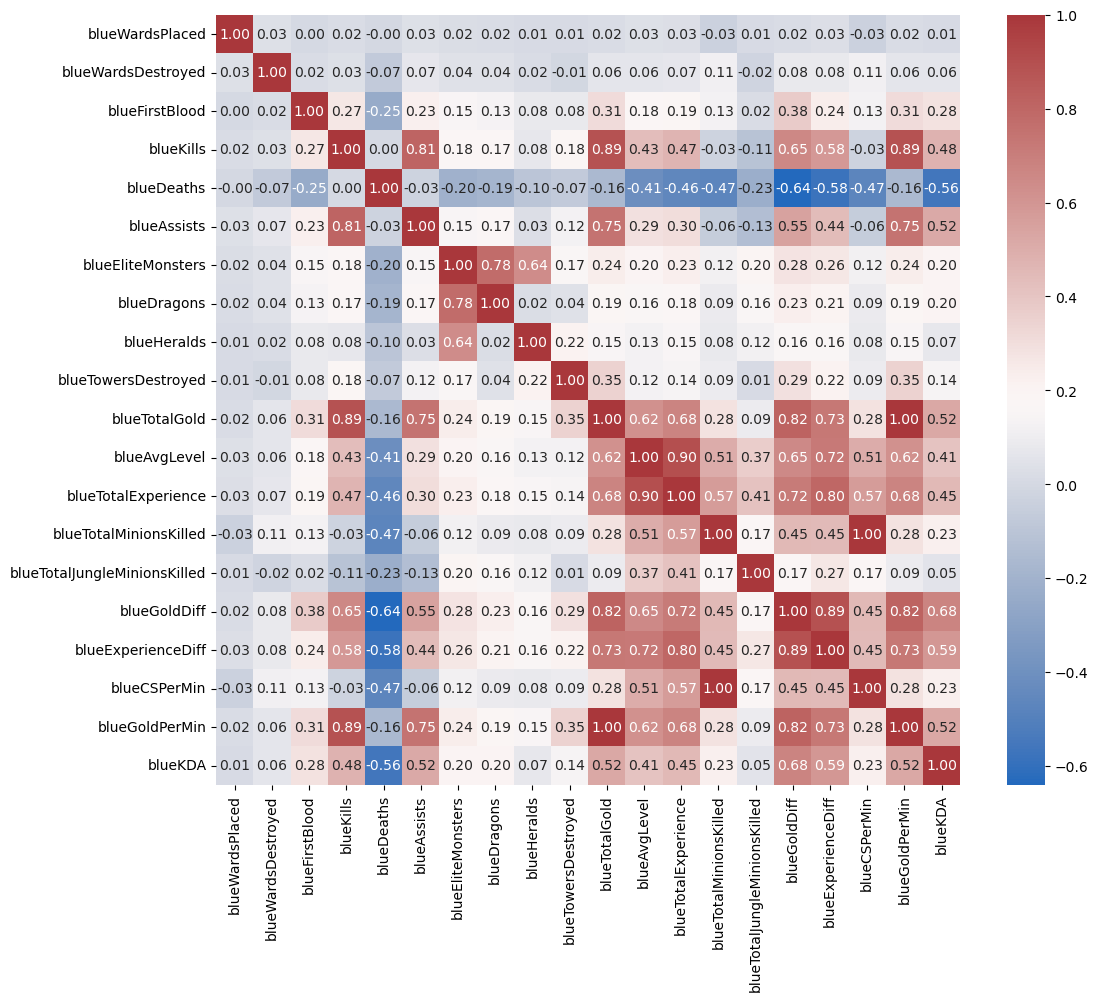

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(blue_data.drop("blueWins",axis=1).corr(),cmap='vlag', annot=True, fmt='.2f')

<AxesSubplot:>

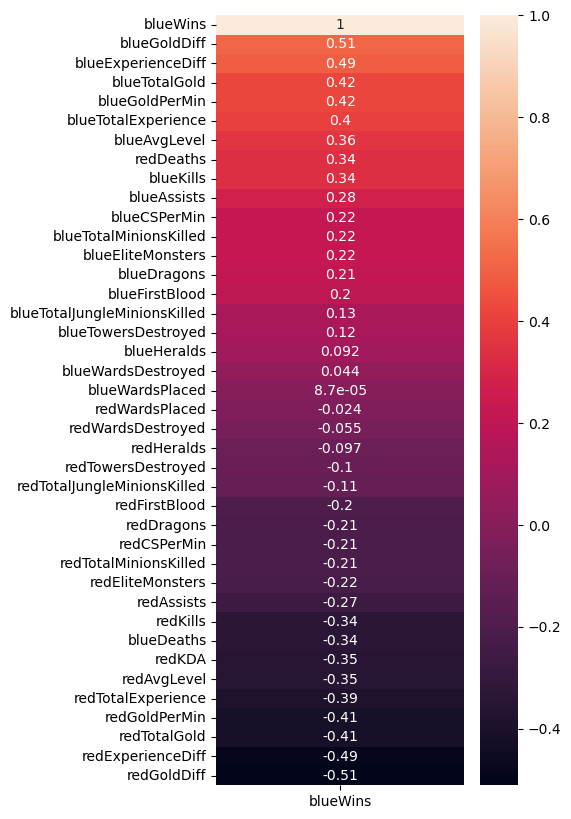

In [55]:
#target변수와 높은 상관관계를 보이는 변수 순서대로 출력

fig = plt.figure(figsize = (4,10))
sns.heatmap(df.corr()[['blueWins']].sort_values(by='blueWins', ascending=False), annot=True)

- 레드 킬과 블루 데스 같음(반대로 레드 데스와 블루 킬 같음)
- redGoldDiff + bluegolddiff = 0
- redExperienceDiff + blueExperienceDiff = 0
- first blood는 하나만 있어도 될 것으로 생각됨
- TotalGold/10 = GoldPerMin
- TotalMinionsKilled/10 = CSPerMin

### 타겟 변수 분포 확인

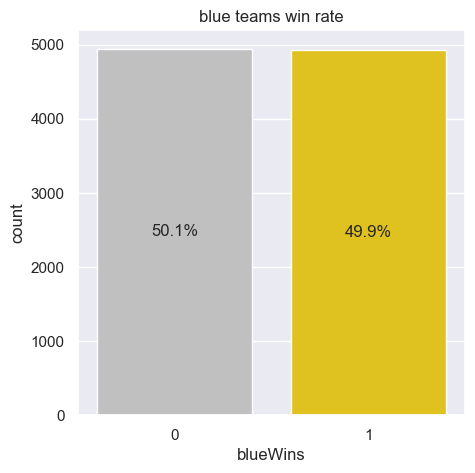

In [59]:
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='blueWins', data=df, palette=['silver', 'gold'])

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{(x/len(df))*100:1.1f}%' for x in containers.datavalues], label_type='center')
plt.title('blue teams win rate')
plt.show()

### 다이아 수준

와드설치, 와드제거, 분당 CS는 실력간의 차이가 크다는 경험 상의 결정에 의해 따로 비교해보았다.

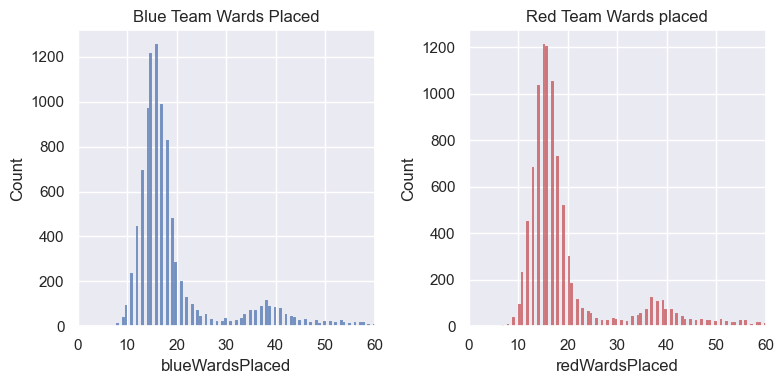

In [136]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

sns.histplot(data=df, x="blueWardsPlaced", ax=ax[0], color="b")
ax[0].set_xlim(0,60)

sns.histplot(data=df, x="redWardsPlaced", ax=ax[1], color="r")
ax[1].set_xlim(0,60)

ax[0].set_title('Blue Team Wards Placed')
ax[1].set_title('Red Team Wards placed')

plt.tight_layout()

In [17]:
print(f"블루가 이길 때 평균 와드 설치 개수는 {round(df[df['blueWins'] == 1]['blueWardsPlaced'].mean(),2)}개 이다.")
print(f"블루가 질 때 평균 와드 설치 개수는 {round(df[df['blueWins'] == 0]['blueWardsPlaced'].mean(),2)}개 이다.")
print(f"레드가 이길 때 평균 와드 설치 개수는 {round(df[df['blueWins'] == 0]['redWardsPlaced'].mean(),2)}개 이다.")
print(f"레드가 질 때 평균 와드 설치 개수는 {round(df[df['blueWins'] == 1]['redWardsPlaced'].mean(),2)}개 이다.")

블루가 이길 때 평균 와드 설치 개수는 22.29개 이다.
블루가 질 때 평균 와드 설치 개수는 22.29개 이다.
레드가 이길 때 평균 와드 설치 개수는 22.8개 이다.
레드가 질 때 평균 와드 설치 개수는 21.93개 이다.


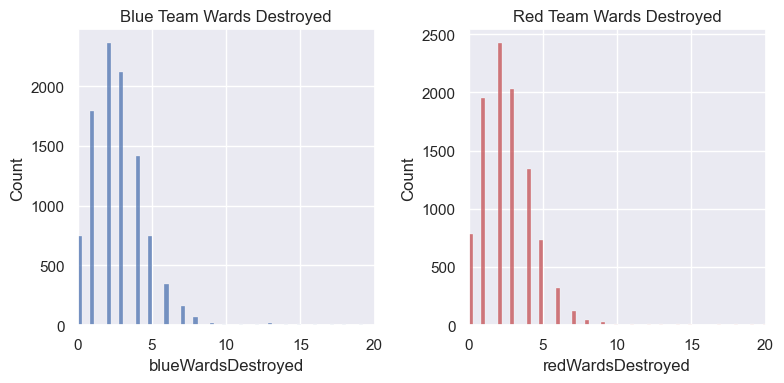

In [137]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

sns.histplot(data=df, x="blueWardsDestroyed", ax=ax[0], color="b")
ax[0].set_xlim(0,20)

sns.histplot(data=df, x="redWardsDestroyed", ax=ax[1], color="r")
ax[1].set_xlim(0,20)

ax[0].set_title('Blue Team Wards Destroyed')
ax[1].set_title('Red Team Wards Destroyed')

plt.tight_layout()

In [19]:
print(f"블루가 이길 때 평균 와드 파괴 개수는 {round(df[df['blueWins'] == 1]['blueWardsDestroyed'].mean(),2)}개 이다.")
print(f"블루가 질 때 평균 와드 파괴 개수는 {round(df[df['blueWins'] == 0]['blueWardsDestroyed'].mean(),2)}개 이다.")
print(f"레드가 이길 때 평균 와드 파괴 개수는 {round(df[df['blueWins'] == 0]['redWardsDestroyed'].mean(),2)}개 이다.")
print(f"레드가 질 때 평균 와드 파괴 개수는 {round(df[df['blueWins'] == 1]['redWardsDestroyed'].mean(),2)}개 이다.")

블루가 이길 때 평균 와드 파괴 개수는 2.92개 이다.
블루가 질 때 평균 와드 파괴 개수는 2.73개 이다.
레드가 이길 때 평균 와드 파괴 개수는 2.84개 이다.
레드가 질 때 평균 와드 파괴 개수는 2.6개 이다.


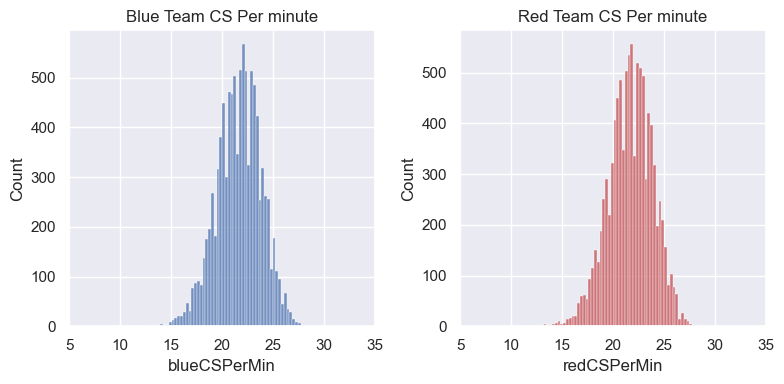

In [138]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

sns.histplot(data=df, x="blueCSPerMin", ax=ax[0], color="b")
ax[0].set_xlim(5,35)

sns.histplot(data=df, x="redCSPerMin", ax=ax[1], color="r")
ax[1].set_xlim(5,35)

ax[0].set_title('Blue Team CS Per minute')
ax[1].set_title('Red Team CS Per minute')
plt.tight_layout()

In [21]:
print(f"블루가 이길 때 평균 분당 CS 개수는 {round(df[df['blueWins'] == 1]['blueCSPerMin'].mean(),2)}개 이다.")
print(f"블루가 질 때 평균 분당 CS 개수는 {round(df[df['blueWins'] == 0]['blueCSPerMin'].mean(),2)}개 이다.")
print(f"레드가 이길 때 평균 분당 CS 개수는 {round(df[df['blueWins'] == 0]['redCSPerMin'].mean(),2)}개 이다.")
print(f"레드가 질 때 평균 분당 CS 개수는 {round(df[df['blueWins'] == 1]['redCSPerMin'].mean(),2)}개 이다.")

블루가 이길 때 평균 분당 CS 개수는 22.16개 이다.
블루가 질 때 평균 분당 CS 개수는 21.18개 이다.
레드가 이길 때 평균 분당 CS 개수는 22.2개 이다.
레드가 질 때 평균 분당 CS 개수는 21.27개 이다.


와드 설치, 와드 제거, 분당 CS 

3가지 요소가 게임 승패에 영향을 끼칠 줄 알았지만 EDA를 해보니 큰 차이가 나지 않았기 때문에 모델학습 때 제외한다.

### 승패에 영향 끼치는 요소들

Text(0.5, 1.0, 'Blue Team Towers Destroyed')

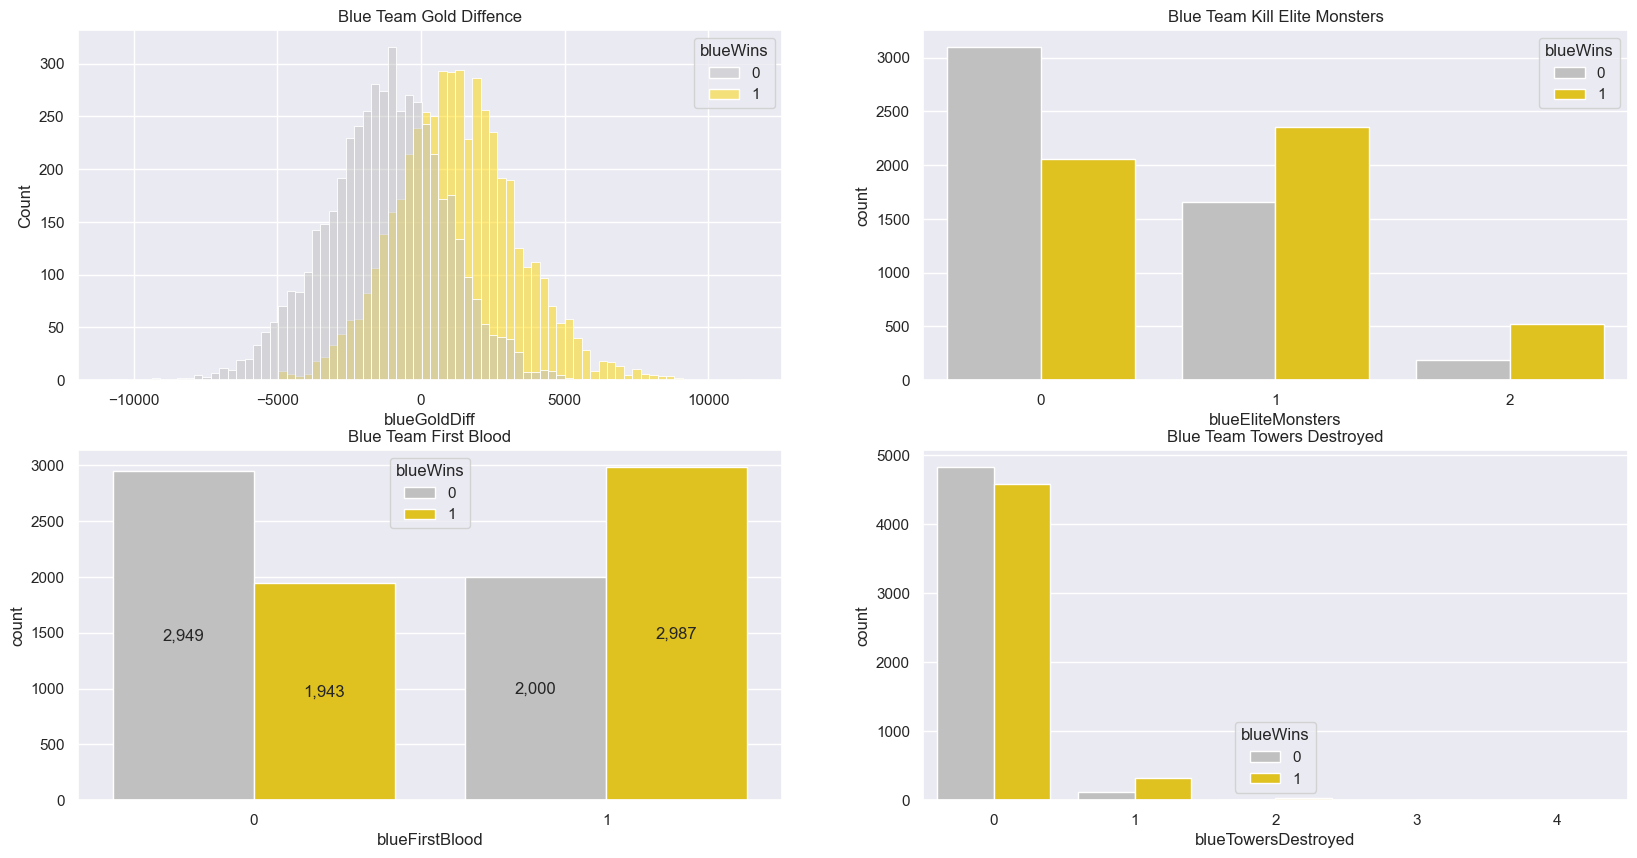

In [142]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))

sns.histplot(x ='blueGoldDiff',data = df, hue = 'blueWins',ax=axs[0][0], palette=['silver', 'gold'])
sns.countplot(x = 'blueEliteMonsters', data = df, hue = 'blueWins', ax=axs[0][1], palette=['silver', 'gold'])
ax = sns.countplot(x = 'blueFirstBlood', data = df, hue = 'blueWins', ax=axs[1][0], palette=['silver', 'gold'])
for containers in ax.containers:
    ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('first blood by blueWins')
sns.countplot(x = 'blueTowersDestroyed', data = df, hue = 'blueWins', ax=axs[1][1], palette=['silver', 'gold'])


axs[0][0].set_title('Blue Team Gold Diffence')
axs[0][1].set_title('Blue Team Kill Elite Monsters')
axs[1][0].set_title('Blue Team First Blood')
axs[1][1].set_title('Blue Team Towers Destroyed')

Text(0.5, 1.0, 'Blue Team Experience Diffence by Blue Gold Difference')

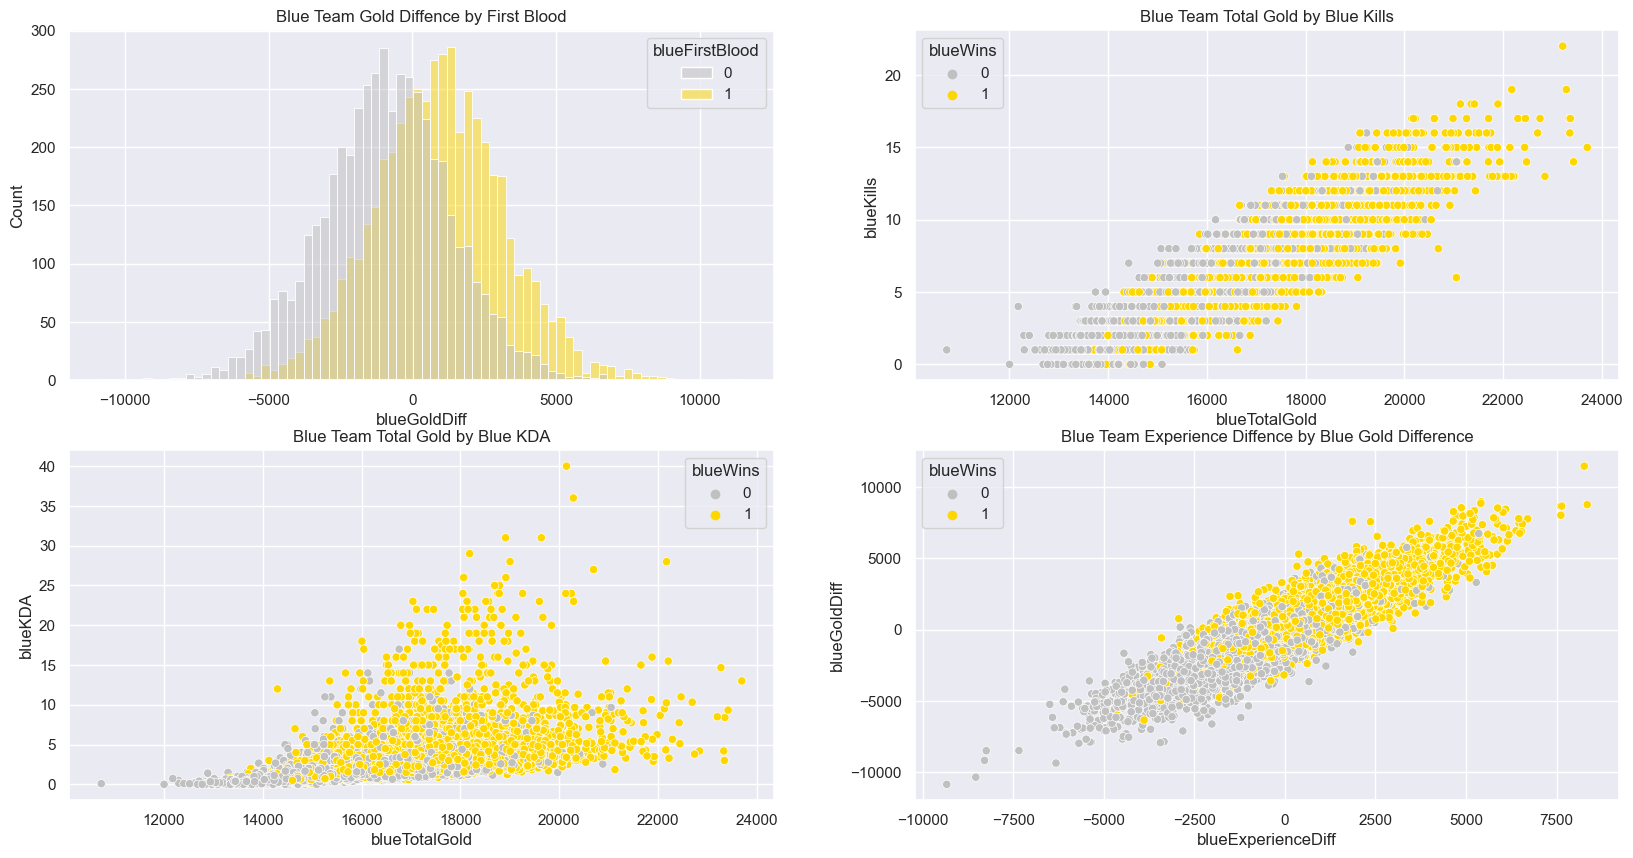

In [148]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))

sns.histplot(x ='blueGoldDiff',data = df, hue = 'blueFirstBlood',ax=axs[0][0], palette=['silver', 'gold'])
sns.scatterplot(x ='blueTotalGold', y = 'blueKills', data = df, hue = 'blueWins',ax=axs[0][1], palette=['silver', 'gold'])
sns.scatterplot(x ='blueTotalGold', y = 'blueKDA', data = df, hue = 'blueWins',ax=axs[1][0], palette=['silver', 'gold'])
sns.scatterplot(x='blueExperienceDiff', y='blueGoldDiff', hue='blueWins', data=df,ax=axs[1][1], palette=['silver', 'gold'])

axs[0][0].set_title('Blue Team Gold Diffence by First Blood')
axs[0][1].set_title('Blue Team Total Gold by Blue Kills')
axs[1][0].set_title('Blue Team Total Gold by Blue KDA')
axs[1][1].set_title('Blue Team Experience Diffence by Blue Gold Difference')

Text(0.5, 1.0, 'Blue Team Total Jungle Minions Killed')

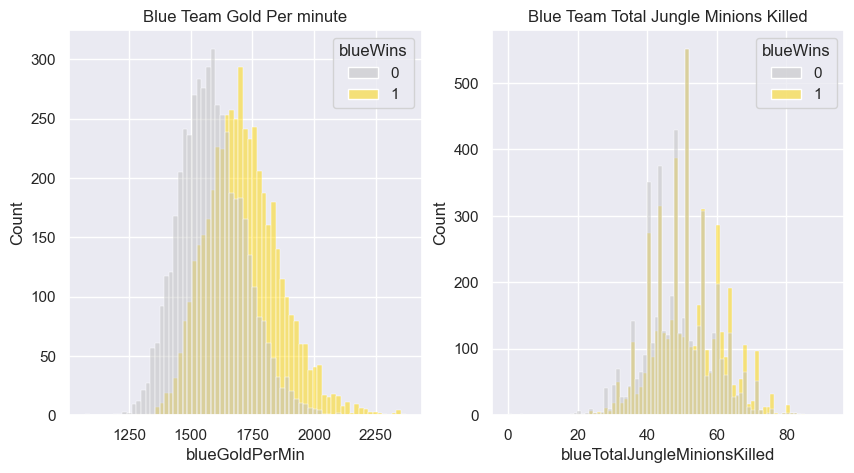

In [146]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.histplot(x = 'blueGoldPerMin', data = df, hue = 'blueWins', ax=ax1, palette=['silver', 'gold'])
sns.histplot(x = 'blueTotalJungleMinionsKilled', data = df, hue = 'blueWins', ax=ax2, palette=['silver', 'gold'])

ax1.set_title('Blue Team Gold Per minute')
ax2.set_title('Blue Team Total Jungle Minions Killed')

## 팀의 가설
1. 많이 죽이는게 승리에 유리한가 아니면 적게 죽는 것이 승리에 유리한가
2. 용 vs 전령 어느 쪽을 선택하는 것이 더 많이 승리했나
3. 정글몹을 많이 먹는 것이 얼마나 승리에 영향을 미치는가

### 가설1. 많이 죽이는게 승리에 유리한가? vs 적게 죽는 것이 승리에 유리한가?

- 롤은 캐릭터를 죽이고 최후의 기지(넥서스)를 먼저 깨는 쪽이 승리하는 게임이다.
- 그래서 우리편은 살고, 상대편은 죽여 경험치와 돈을 얻어 아이템을 사서 경쟁하는 5vs5 팀 게임.
- 킬을 많이 하면 돈을 빨리 얻을 수 있고, 적게 죽으면 상대방에게 돈이나 경험치를 안 줄 수 있다.
- 해당 가설을 시각화를 통해 확인해보고자 한다.

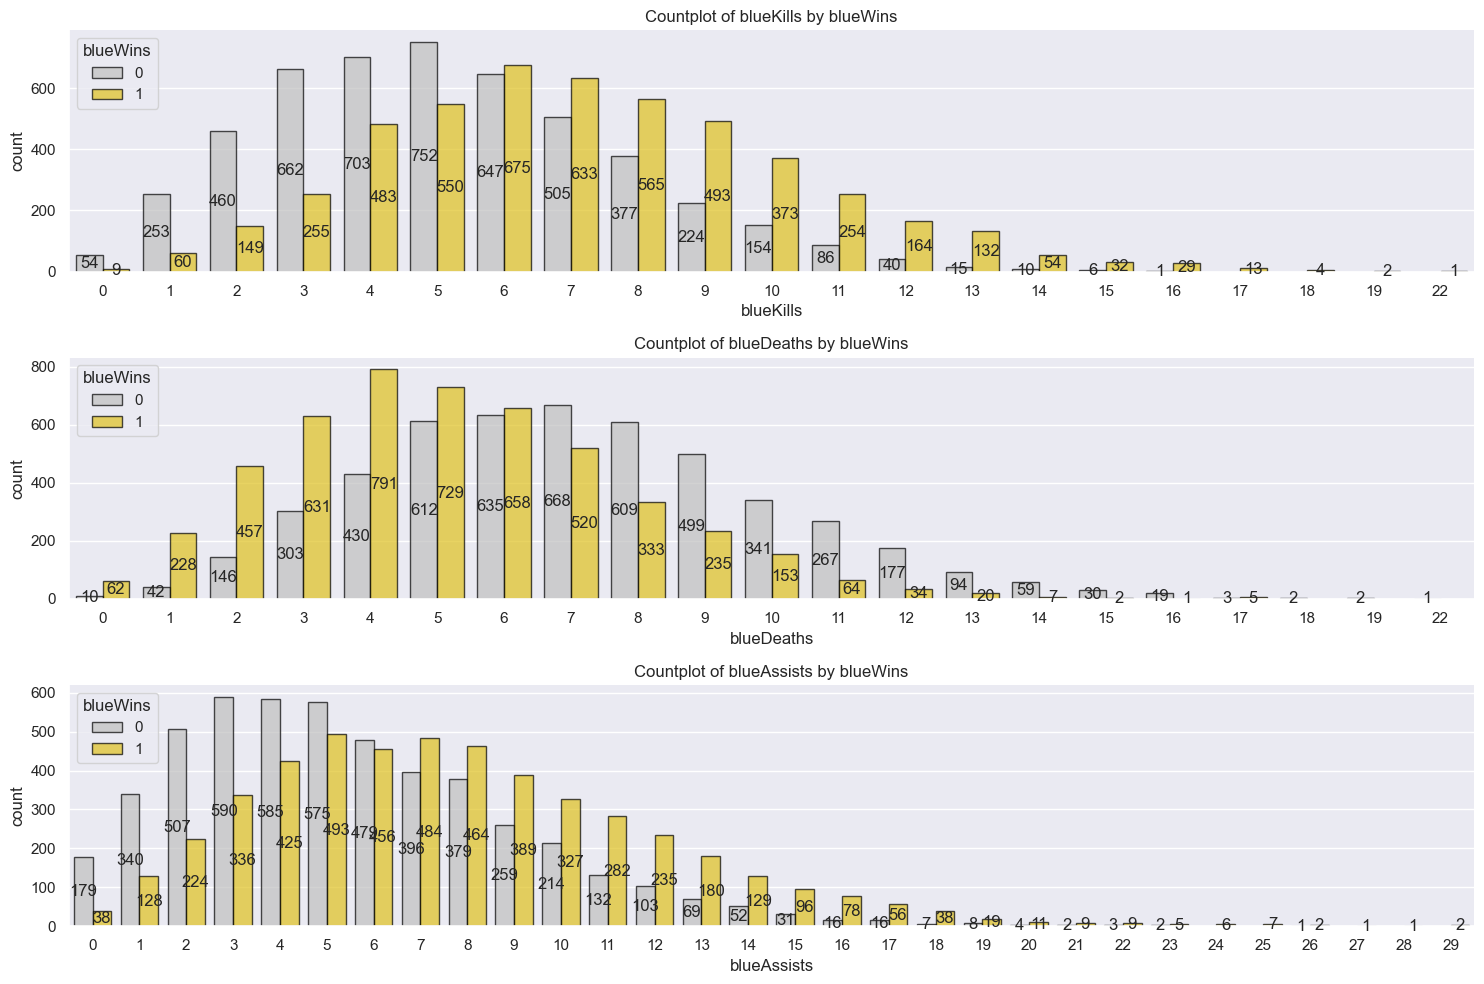

In [63]:
# 킬, 데스, 어시스트가 승패에 미치는 영향

plt.figure(figsize=[15,10])
kda= df[['blueKills', 'blueDeaths', 'blueAssists']]

n=1
for f in kda:
    plt.subplot(3,1,n)
    ax = sns.countplot(x=f, hue='blueWins', edgecolor="black", alpha=0.7, data=df, palette=['silver', 'gold'])
    sns.despine()
    for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
    plt.title("Countplot of {} by blueWins".format(f))
    n=n+1
plt.tight_layout()
plt.show()

- 해당 그림은 결과 결과에 따른 킬, 데스, 어시스트를 보여줌
- 승리할수록 킬이 많았으며, 데스는 적은것으로 알 수 있음
- 킬과 연관된 어시스트도 승리할수록 많은것을 알 수 있음

승리한 경기 기준 평균 킬: 7.2
승리한 경기 기준 평균 데스: 5.14
승리한 경기 기준 평균 어시스트: 7.77
패배한 경기 기준 평균 킬: 5.17
패배한 경기 기준 평균 데스: 7.13
패배한 경기 기준 평균 어시스트: 5.52


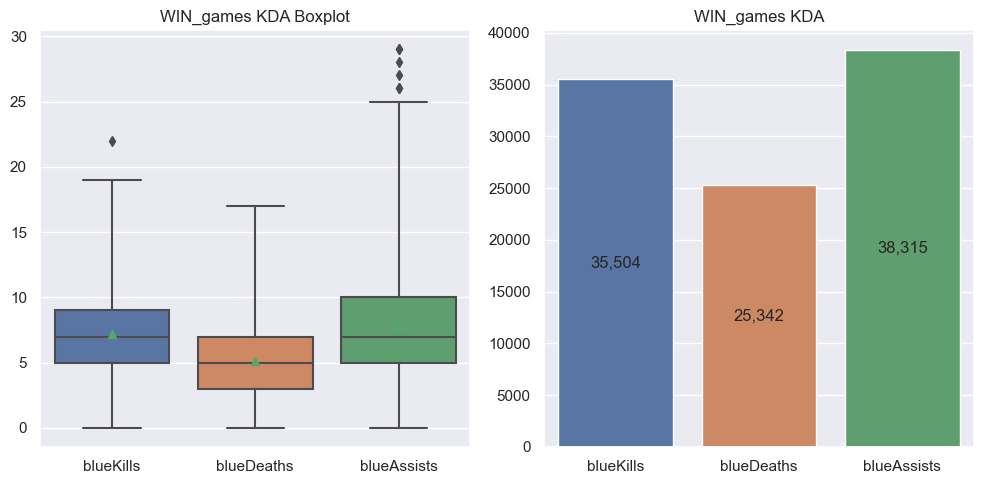

In [134]:
# 승리한 게임에 따른 평균 킬, 평균 데스, 평균 어시스트와 boxplot, barplot

game_win = df[df['blueWins']==1] #승리한 게임
game_lose = df[df['blueWins']==0] #패배한 게임

print('승리한 경기 기준 평균 킬:',round(game_win['blueKills'].mean(),2))
print('승리한 경기 기준 평균 데스:',round(game_win['blueDeaths'].mean(),2))
print('승리한 경기 기준 평균 어시스트:',round(game_win['blueAssists'].mean(),2))
print('패배한 경기 기준 평균 킬:',round(game_lose['blueKills'].mean(),2))
print('패배한 경기 기준 평균 데스:',round(game_lose['blueDeaths'].mean(),2))
print('패배한 경기 기준 평균 어시스트:',round(game_lose['blueAssists'].mean(),2))

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(data =game_win[['blueKills','blueDeaths','blueAssists']],showmeans=True, whis = 3)
plt.xticks([0,1,2],['blueKills', 'blueDeaths','blueAssists'])
plt.title('WIN_games KDA Boxplot')

plt.subplot(1,2,2)
ax = sns.barplot(x = ['blueKills', 'blueDeaths', 'blueAssists'], y=[game_win['blueKills'].sum(), game_win['blueDeaths'].sum(), game_win['blueAssists'].sum()])
for containers in ax.containers:
    ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('WIN_games KDA')

plt.tight_layout()
plt.show()

#### 승리한 게임 기준 평균 킬보다 많이 했던 경기와 평균 데스보다 작게 죽었던 경기 KDA 도출

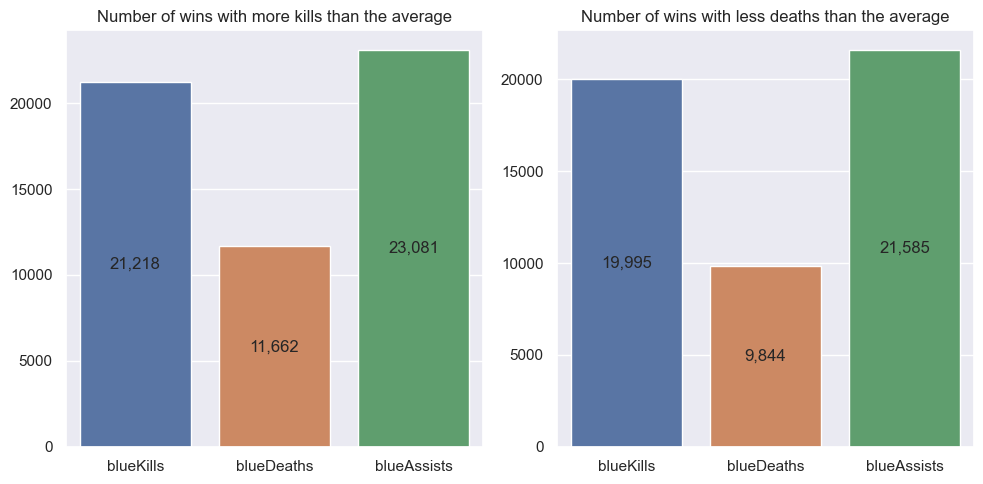

평균 킬보다 킬을 많이 내고 이긴 횟수 : 2116 경기
평균 데스보다 적게 죽고 이긴 횟수 : 2898 경기
평균 킬의 차: 1223
평균 데스의 차: 1818


In [81]:
win_game_mean_kill = game_win[game_win['blueKills']>game_win['blueKills'].mean()]
win_game_mean_death = game_win[game_win['blueDeaths']<game_win['blueDeaths'].mean()]

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
ax = sns.barplot(x = ['blueKills', 'blueDeaths', 'blueAssists'], y=[win_game_mean_kill['blueKills'].sum(), win_game_mean_kill['blueDeaths'].sum(), win_game_mean_kill['blueAssists'].sum()])
for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Number of wins with more kills than the average')

plt.subplot(1,2,2)
ax = sns.barplot(x = ['blueKills', 'blueDeaths', 'blueAssists'], y=[win_game_mean_death['blueKills'].sum(), win_game_mean_death['blueDeaths'].sum(), win_game_mean_death['blueAssists'].sum()])
for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Number of wins with less deaths than the average')

plt.tight_layout()
plt.show()

print('평균 킬보다 킬을 많이 내고 이긴 횟수 : {} 경기'.format(len(win_game_mean_kill)))
print('평균 데스보다 적게 죽고 이긴 횟수 : {} 경기'.format(len(win_game_mean_death)))
print('평균 킬의 차:',win_game_mean_kill['blueKills'].sum()-win_game_mean_death['blueKills'].sum())
print('평균 데스의 차:',win_game_mean_kill['blueDeaths'].sum()-win_game_mean_death['blueDeaths'].sum())

#### 각 팀별 kill 수와 death 수를 기준으로 승리한 팀을 분석
- 첫 번째 시도로 각 팀별 kill 수와 death 수를 기준으로 승리한 팀을 단순하게 산포도로 시각화
    - 전반적인 흐름을 확인할 수 있으나 각 점이 얼마나 많은 중복된 수를 가지고 있는지 알 수 없어서 우리의 가설을 완벽하게 증명할 수 없었다

<AxesSubplot:xlabel='redKills', ylabel='redDeaths'>

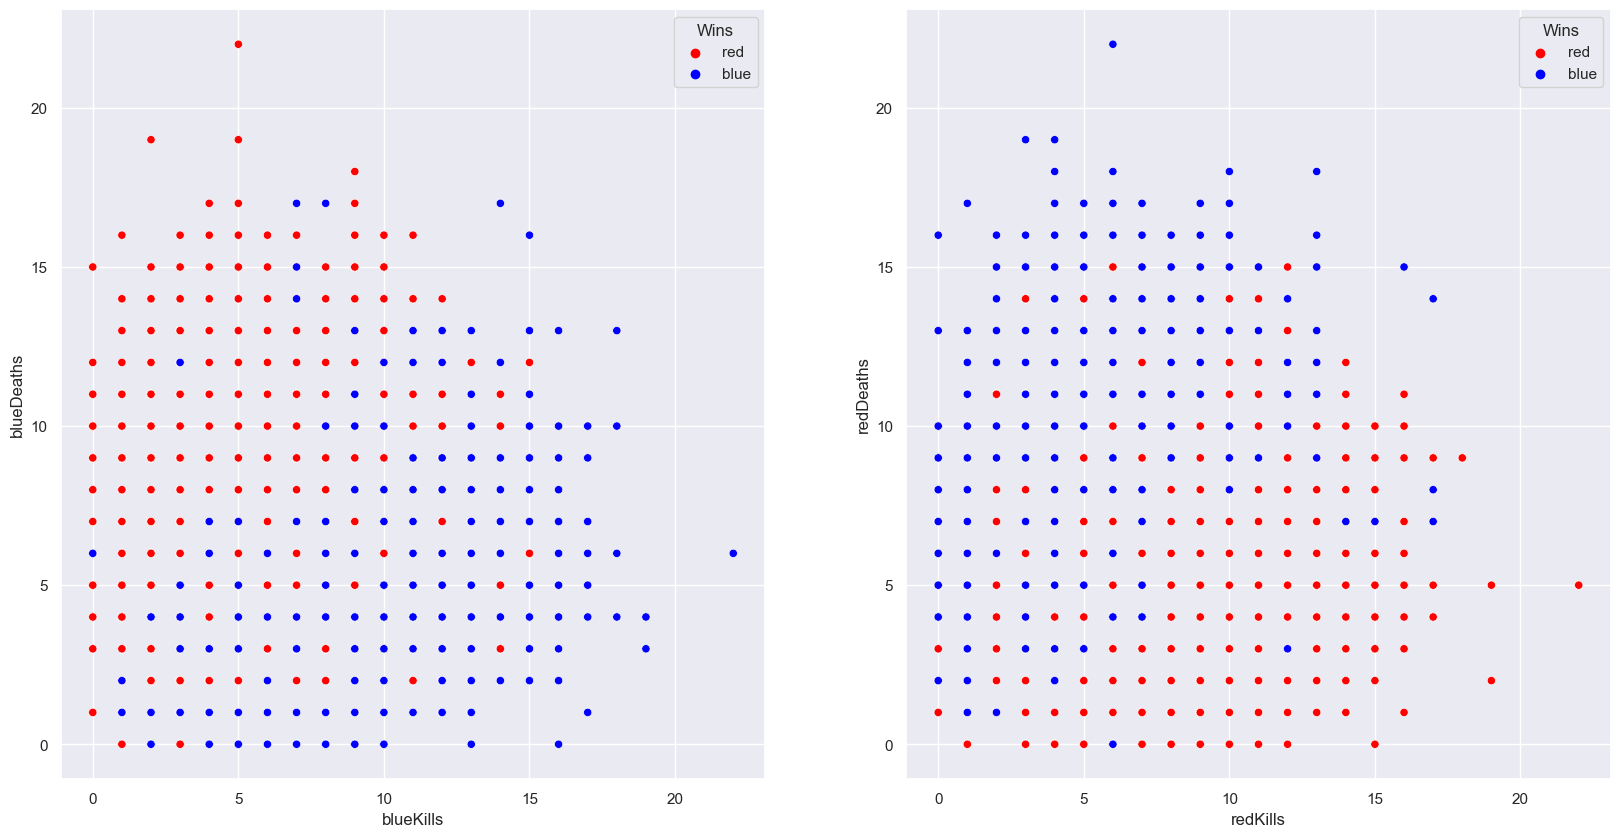

In [99]:
df['Wins'] = ['blue' for i in range(len(df['blueWins']))]
df['Wins'].loc[df['blueWins'] == 0] = 'red' 

f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x= 'blueKills', y = 'blueDeaths', hue = 'Wins', data=df, palette = ['red', 'blue'], ax = ax[0])
sns.scatterplot(x= 'redKills', y = 'redDeaths', hue = 'Wins', data=df, palette = ['red', 'blue'], ax = ax[1])

#### 각 팀별 kill수와 death 수를 기준으로 각팀의 승률 그리고 승리 수 차이 분석
- 좀 더 유의미하고 정확한 분석을 위해 kill수와 death수를 기준으로 승률과 상대팀과의 승수 차이를 분석해보았다.


<AxesSubplot:title={'center':'Win Diffence(Groupby blueKills and blueDeaths)'}, xlabel='blueKills', ylabel='blueDeaths'>

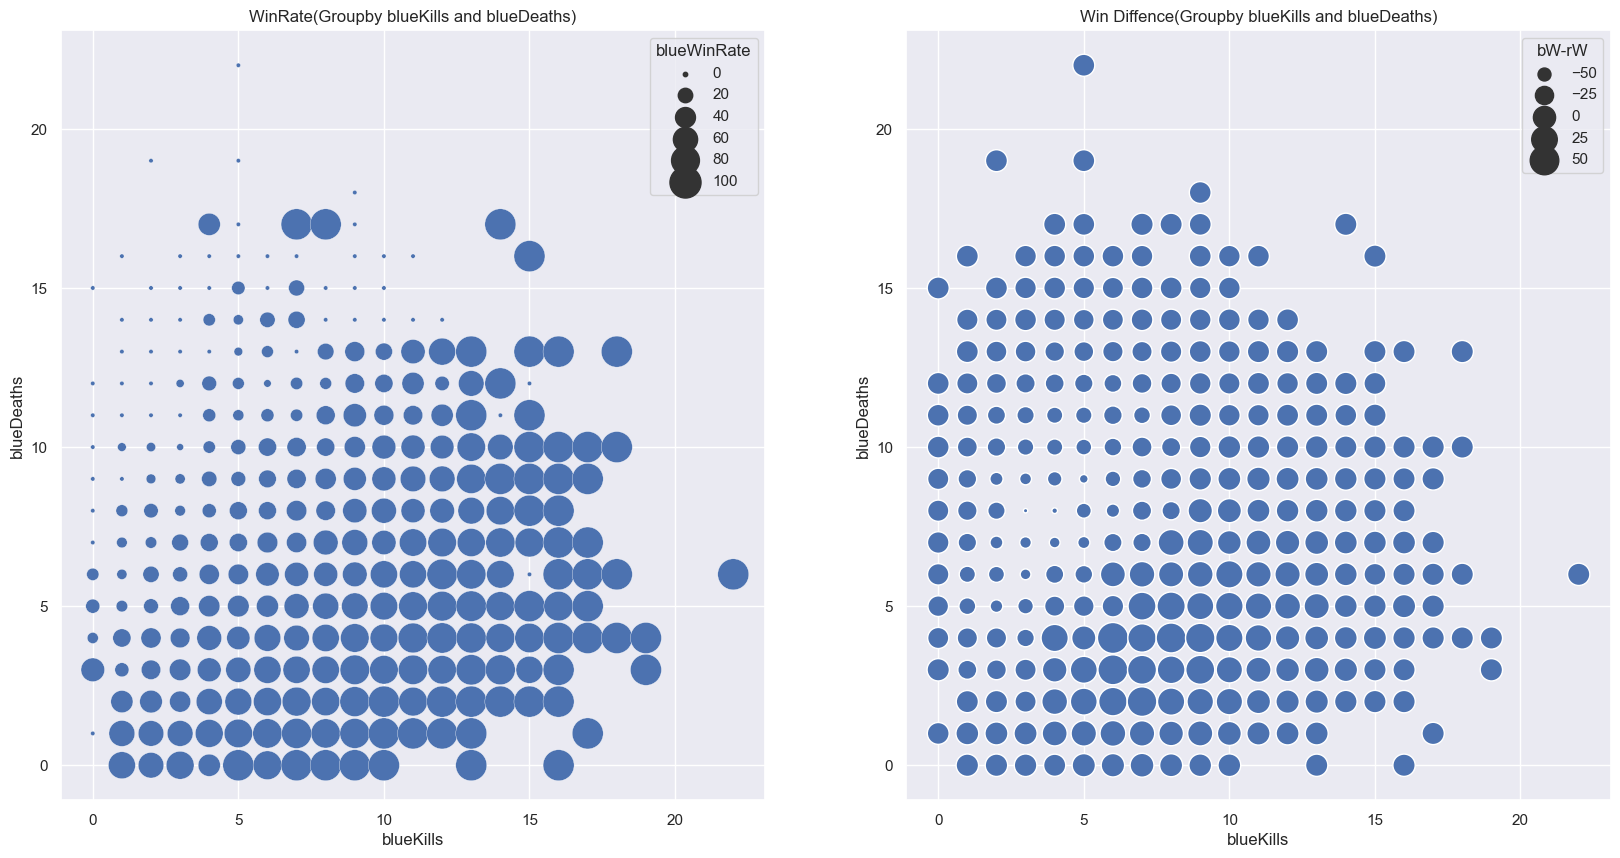

In [100]:
df['redWins'] = 1 - df['blueWins']

# blueKIlls 및 buleDeaths 기준으로 그룹화
h_1 = pd.DataFrame(df.groupby(['blueKills', 'blueDeaths', 'Wins']).sum()['blueWins'])

# 그룹별 blue 팀 승리 수
h_1['blueWins'] = pd.DataFrame(df.groupby(['blueKills', 'blueDeaths', 'Wins']).sum()['blueWins'])

# 그룹별 red 팀 승리 수
h_1['redWins'] = pd.DataFrame(df.groupby(['blueKills', 'blueDeaths', 'Wins']).sum()['redWins'])

# 그룹별 blue 팀 승리 수 - red 팀 승리 수
h_1['bW-rW'] = h_1['blueWins'] - h_1['redWins']

# 그룹별 blue 팀 승리확률(%)
h_2 = pd.DataFrame(h_1.groupby(['blueKills', 'blueDeaths']).sum())
h_2['blueWinRate'] = (h_2['blueWins'] / (h_2['blueWins'] + h_2['redWins'])).round(2) * 100
h_2

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title('WinRate(Groupby blueKills and blueDeaths)')
sns.scatterplot(x= 'blueKills', y = 'blueDeaths', size = 'blueWinRate', data=h_2, palette = 'blue', ax = ax[0], sizes = (10, 500))

ax[1].set_title('Win Diffence(Groupby blueKills and blueDeaths)')
sns.scatterplot(x= 'blueKills', y = 'blueDeaths', size = 'bW-rW', data=h_2, palette = 'blue', ax = ax[1], sizes = (10, 500))

<AxesSubplot:title={'center':'Win Diffence(Groupby redKills and redDeaths)'}, xlabel='redKills', ylabel='redDeaths'>

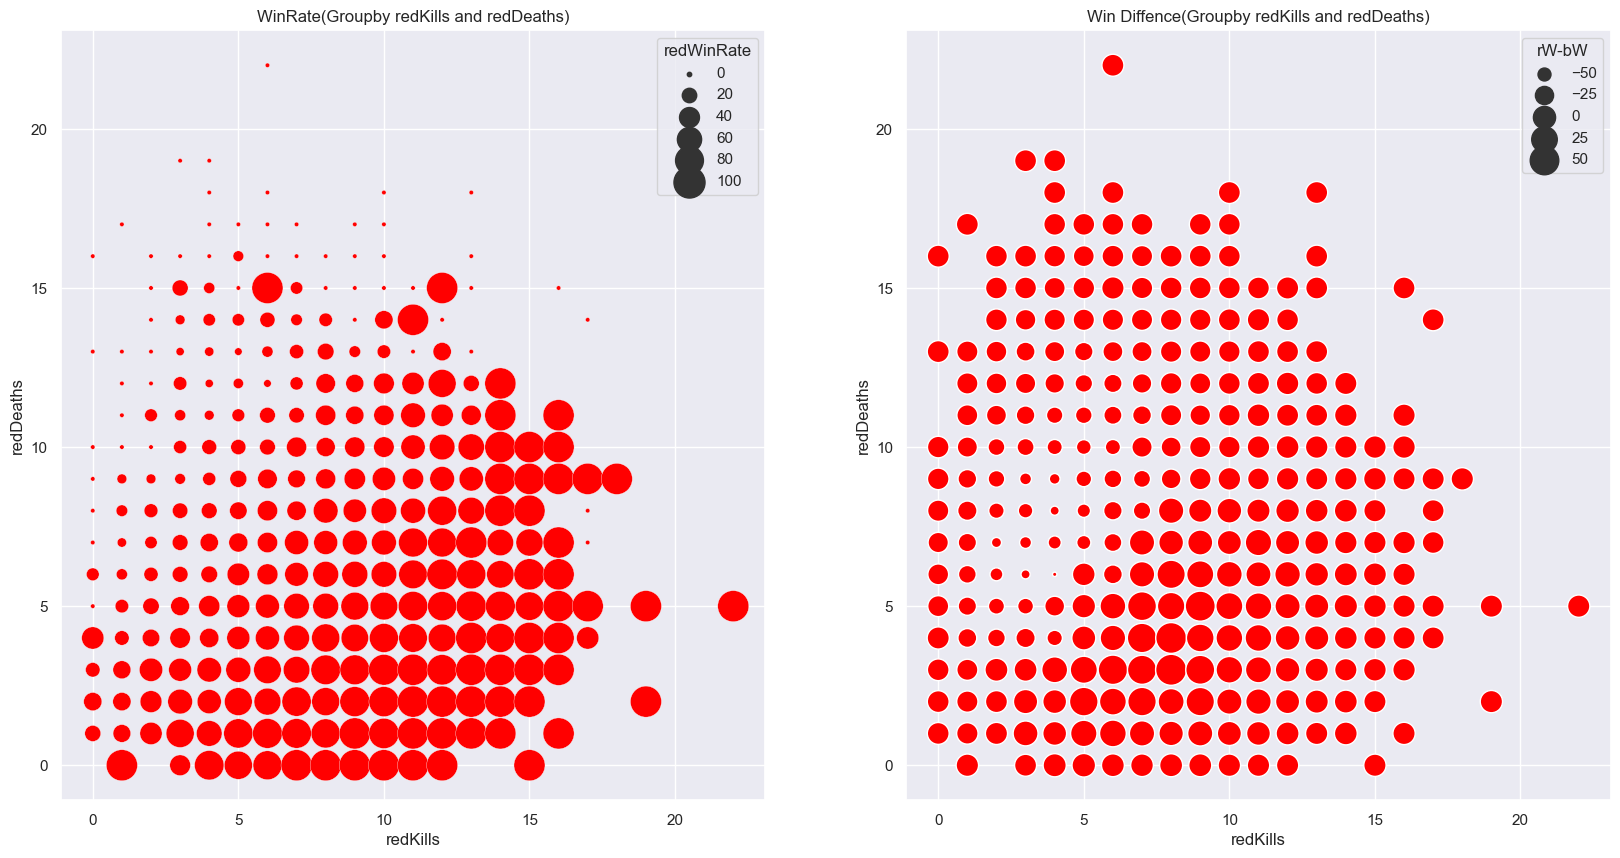

In [101]:
# redKIlls 및 redDeaths 기준으로 그룹화
h_3 = pd.DataFrame(df.groupby(['redKills', 'redDeaths', 'Wins']).sum()['blueWins'])

# 그룹별 blue 팀 승리 수
h_3['blueWins'] = pd.DataFrame(df.groupby(['redKills', 'redDeaths', 'Wins']).sum()['blueWins'])

# 그룹별 red 팀 승리 수
h_3['redWins'] = pd.DataFrame(df.groupby(['redKills', 'redDeaths', 'Wins']).sum()['redWins'])

# 그룹별 red 팀 승리 수 - blue 팀 승리 수
h_3['rW-bW'] = h_3['redWins'] - h_3['blueWins']

# 그룹별 red 팀 승리확률(%)
h_4 = pd.DataFrame(h_3.groupby(['redKills', 'redDeaths']).sum())
h_4['redWinRate'] = (h_4['redWins'] / (h_4['redWins'] + h_4['blueWins'])).round(2) * 100
h_4

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title('WinRate(Groupby redKills and redDeaths)')
sns.scatterplot(x= 'redKills', y = 'redDeaths', size = 'redWinRate', data=h_4, color = 'red', ax = ax[0], sizes = (10, 500))
ax[1].set_title('Win Diffence(Groupby redKills and redDeaths)')
sns.scatterplot(x= 'redKills', y = 'redDeaths', size = 'rW-bW', data=h_4, color = 'red', ax = ax[1], sizes = (10, 500))

### 가설 1의 결론
- 알려진 통념과 같이 kill을 많이하고 death를 적게한 경우 승률이 크게 높은 것을 확인할 수 있었고 반대로 death를 많이하고 kill을 적게한 경우 승률이 눈에 띄게 낮은 것을 확인할 수 있었다.
- 가설을 확인하기 위해 kill, death가 모두 적은 부분과 kill, death가 모두 많은 부분을 확인하였을 때 kill과 death 수가 많은 쪽이 상대적으로 높은 승률을 표시하는 큰 점이 많은 것을 확인할 수 있었다.

### 가설 2. Dragon 처치 vs Herald 처치 어느 쪽이 승리에 유리한가?
- 롤이라는 게임에는 중요한 효과를 가진 Elitemonster가 크게 3종류 존재한다.
    1. Dragon(용) - 한 팀이 4마리를 처치할 경우 영구적인 효과(드래곤의 영혼)을 획득할 수 있고 드래곤의 영혼을 획득한 이후에는 강력한 일시적인 버프를 주는 드래곤이 출현한다.(그러므로 초반 드래곤의 처치는 분명 승리에 유의미한 영향을 미친다고 생각) 
    2. Herald(전령) - 전령을 획득하면 이를 활용해서 경기 초반 손쉽게 상대방의 포탑을 공격하여(포탑 방패 골드 혹은 더 나아가 포탑 파괴) 상대팀 보다 더 많은 골드를 획득할 수 있다.
    3. Baron(바론) - 강력한 버프를 주는 몬스터지만 경기 시간 20분 이후에 출현하기 때문에 이는 고려대상이 아니다.
- 저희 팀이 활용한 자료는 경기 초반 10분 상황의 데이터이므로 용과 전령에 대한 데이터를 다루었으며 드래곤 출현시간은 첫 용이 5분 그 이후 생성 간격 역시 5분이므로 10분까지 최대로 처치가능한 Elite monster는 용 1마리, 전령 1마리이다.
- 물론 두 마리다 처치하면 많이 유리하겠지만 비슷한 실력을 가진 두 팀이 만난 경우 대부분 한 마리씩 나눠먹는 상황이 많이 나온다. 그래서 어느 방향을 선택하는 것이 승리에 유리할 것인가에 대하여 분석해 보았다.

#### 용만 차지한 경기의 KDA와 전령만 차지한 경기의 KDA 비교

(3576, 44)
(1857, 44)


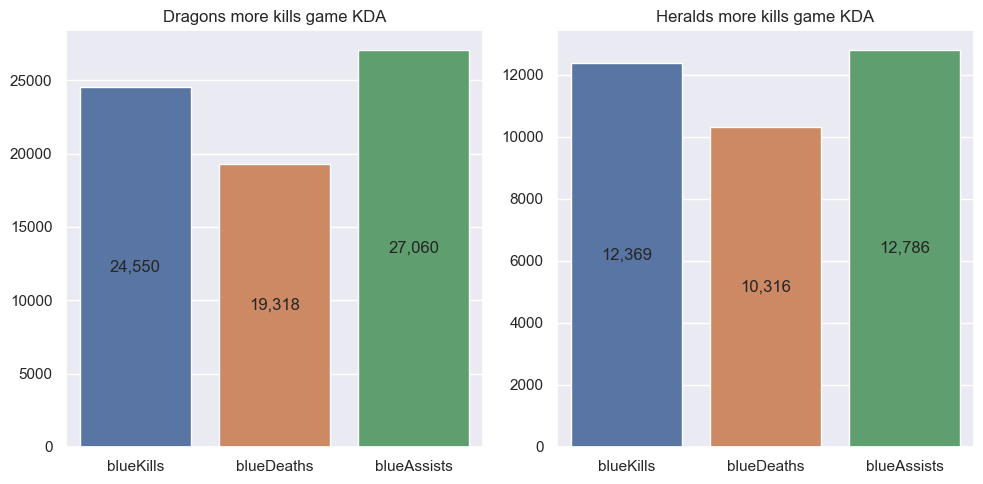

드래곤만 처치한 경기의 평균 킬, 데스, 어시스트 : kills:6.87, deaths:5.4, assists:7.57 
전령만 처치한 경기의 평균 킬, 데스, 어시스트 : kills:6.66, deaths:5.56, assists:6.89 


In [108]:
Dragons = df[df['blueDragons']==1]
Heralds = df[df['blueHeralds']==1]

print(Dragons.shape)
print(Heralds.shape)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
ax = sns.barplot(x = ['blueKills', 'blueDeaths', 'blueAssists'], y=[Dragons['blueKills'].sum(), Dragons['blueDeaths'].sum(), Dragons['blueAssists'].sum()])
for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Dragons more kills game KDA')

plt.subplot(1,2,2)
ax = sns.barplot(x = ['blueKills', 'blueDeaths', 'blueAssists'], y=[Heralds['blueKills'].sum(), Heralds['blueDeaths'].sum(), Heralds['blueAssists'].sum()])
for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Heralds more kills game KDA')

plt.tight_layout()
plt.show()

print('드래곤만 처치한 경기의 평균 킬, 데스, 어시스트 : kills:{}, deaths:{}, assists:{} '.format(round(Dragons['blueKills'].mean(),2), round(Dragons['blueDeaths'].mean(),2), round(Dragons['blueAssists'].mean(),2)))
print('전령만 처치한 경기의 평균 킬, 데스, 어시스트 : kills:{}, deaths:{}, assists:{} '.format(round(Heralds['blueKills'].mean(),2), round(Heralds['blueDeaths'].mean(),2), round(Heralds['blueAssists'].mean(),2)))

#### 1. blue 팀이 드래곤을 처치, red 팀이 전령을 처치한 경우

Text(0.5, 1.0, 'blue kill Dragon, red kill Herald(%)')

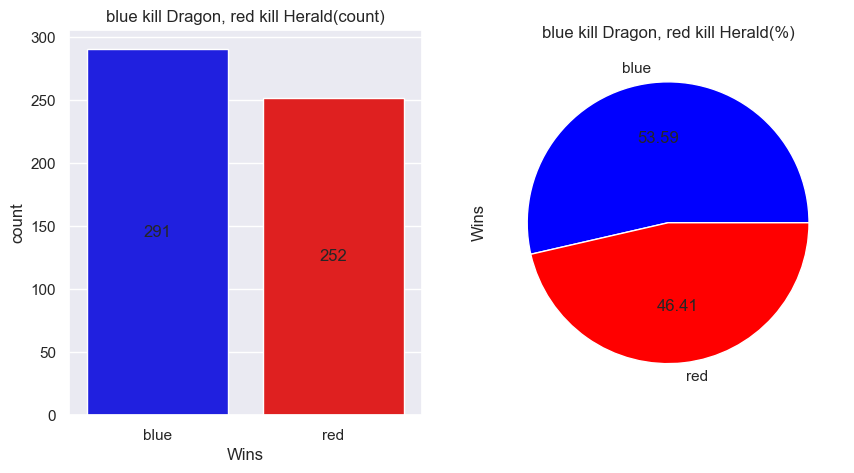

In [104]:
b_o_d_r_o_h = df.loc[(df['blueDragons'] == 1) & (df['blueHeralds'] == 0) & (df['redDragons'] == 0) & (df['redHeralds'] == 1)]

f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=b_o_d_r_o_h, x = 'Wins', ax = ax[0], palette = ['blue', 'red'])
b_o_d_r_o_h['Wins'].value_counts().plot.pie(autopct = '%.2f', ax = ax[1], colors = ['blue', 'red'])
for containers in ax[0].containers:
    ax[0].bar_label(containers, labels = [f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax[0].set_title('blue kill Dragon, red kill Herald(count)')
ax[1].set_title('blue kill Dragon, red kill Herald(%)')

#### 2. red 팀이 드래곤을 처치, blue 팀이 전령을 처치한 경우

Text(0.5, 1.0, 'blue kill Herald, red kill Dragon(%)')

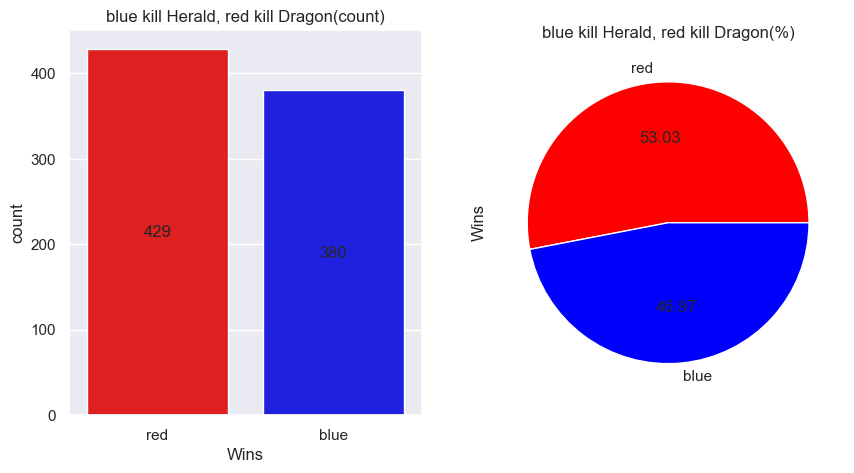

In [106]:
b_o_h_r_o_d = df.loc[(df['blueDragons'] == 0) & (df['blueHeralds'] == 1) & (df['redDragons'] == 1) & (df['redHeralds'] == 0)]

f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=b_o_h_r_o_d, x = 'Wins', ax = ax[0], palette = ['red', 'blue'])
b_o_h_r_o_d['Wins'].value_counts().plot.pie(autopct = '%.2f', ax = ax[1], colors = ['red', 'blue'])
for containers in ax[0].containers:
    ax[0].bar_label(containers, labels = [f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax[0].set_title('blue kill Herald, red kill Dragon(count)')
ax[1].set_title('blue kill Herald, red kill Dragon(%)')

### 가설 2의 결론
- 우선 최대한 정확한 비교를 위해 blue 팀과 red 팀이 dragon과 herald 중 각각 하나씩 처치한 데이터를 추출하였다.
- 실력이 비슷한 팀간의 경기에서 경기 초반 어느 Elite monster를 처치하는 것이 유리한가는 패치 버전에 따라 자주 바뀌지만 현재의 데이터를 바탕으로 분석해보면 blue, red 팀 상관없이 초반에 drgon을 선택하는 팀이 이길 확률이 확연하게 높았다.
    - blue팀이 drgon을 처치한 경우(red팀은 herald를 처치) blue팀이 이길 확률이 약 53.59%
    - red팀이 drgon을 처치한 경우(blue팀은 herald를 처치) red팀이 이길 확률이 약 53.03%

### 가설 3. 정글러의 성장은 승리에 얼마나 영향을 미치는가?
- 롤에 존재하는 포지션 5개 중 일반적으로 게임의 흐름에 중요한 영향을 미치는 포지션이 정글이다.
- 정글러의 성향은 여러 가지가 존재하는데 이 중 성장형 정글(정글 몬스터를 많이 처치하는 성향)이 게임에 미치는 영향을 알아보고자 상대방 정글과의 처치한 몬스터 수를 기반으로 분석해보았다.

#### 정글몹 & 미니언과 관련한 토탈 골드와 경험치 산점도

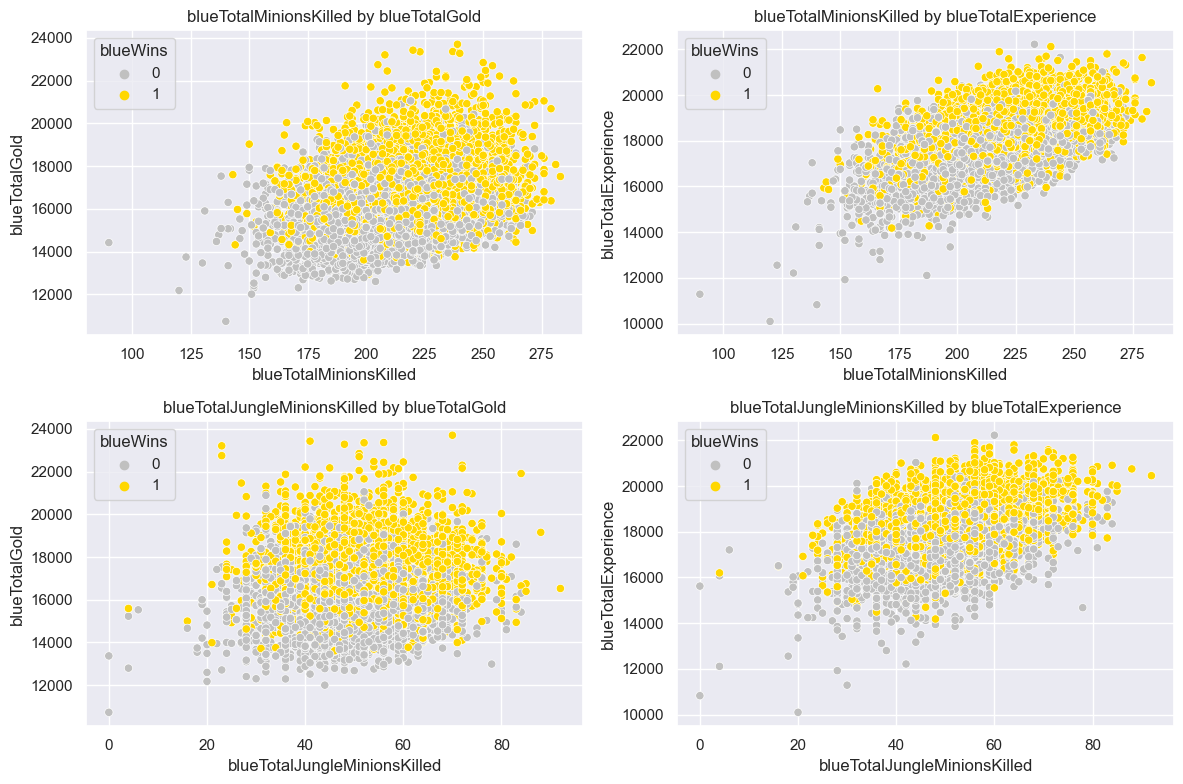

In [121]:
plt.figure(figsize=[12,8])
miniuns = ['blueTotalMinionsKilled','blueTotalJungleMinionsKilled']
total = ['blueTotalGold','blueTotalExperience']

count = 1
for i in miniuns:
    for k in total:
        plt.subplot(2,len(total),count)
        sns.scatterplot(x = i, y = k, hue = 'blueWins', data = df, palette=['silver', 'gold'])
        plt.title(f'{i} by {k}')
        count += 1
plt.tight_layout() #플롯간 여백 조정
plt.show()

In [118]:
# blue 팀 정글이 처치한 몬스터 수와 red 팀 정글이 처치한 몬스터 수의 차이
df['bluejgDiff'] = df['blueTotalJungleMinionsKilled'] - df['redTotalJungleMinionsKilled']

# 정글과 관련된 칼럼들
jg_features_blue = ['blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled', 'bluejgDiff', 'blueWins', 'redWins']
jg_blue= df[jg_features_blue]

# blue 정글과 red 정글의 차이인 bluejgDiff를 기준으로 그룹화
jg_data_blue = pd.DataFrame(jg_blue.groupby(['bluejgDiff']).sum()['blueWins'])

# 그룹별 blue 팀 승리 수
jg_data_blue['blueWins'] = pd.DataFrame(df.groupby(['bluejgDiff']).sum()['blueWins'])

# 그룹별 red 팀 승리 수
jg_data_blue['redWins'] = pd.DataFrame(df.groupby(['bluejgDiff']).sum()['redWins'])

# 그룹별 red 팀 승리 수 - blue 팀 승리 수
jg_data_blue['bW-rW'] = jg_data_blue['blueWins'] - jg_data_blue['redWins']
# 그룹별 red 팀 승리확률(%)
jg_data_blue['blueWinRate'] = (jg_data_blue['blueWins'] / (jg_data_blue['blueWins'] + jg_data_blue['redWins'])).round(2) * 100

In [117]:
# red 팀 정글이 처치한 몬스터 수와 blue 팀 정글이 처치한 몬스터 수의 차이
df['redjgDiff'] = df['redTotalJungleMinionsKilled'] - df['blueTotalJungleMinionsKilled']

# 정글과 관련된 칼럼들
jg_features_red = ['redTotalJungleMinionsKilled', 'blueTotalJungleMinionsKilled', 'redjgDiff', 'redWins', 'blueWins']
jg_red = df[jg_features_red]

# blue 정글과 red 정글의 차이인 bluejgDiff를 기준으로 그룹화
jg_data_red = pd.DataFrame(jg_red.groupby(['redjgDiff']).sum()['redWins'])

# 그룹별 red 팀 승리 수
jg_data_red['redWins'] = pd.DataFrame(df.groupby(['redjgDiff']).sum()['redWins'])

# 그룹별 blue 팀 승리 수
jg_data_red['blueWins'] = pd.DataFrame(df.groupby(['redjgDiff']).sum()['blueWins'])



# 그룹별 red 팀 승리 수 - blue 팀 승리 수
jg_data_red['rW-bW'] = jg_data_red['redWins'] - jg_data_red['blueWins']
# 그룹별 red 팀 승리확률(%)
jg_data_red['redWinRate'] = (jg_data_red['redWins'] / (jg_data_red['blueWins'] + jg_data_red['redWins'])).round(2) * 100

Text(0.5, 1.0, 'red Team Winrate(by red jg)')

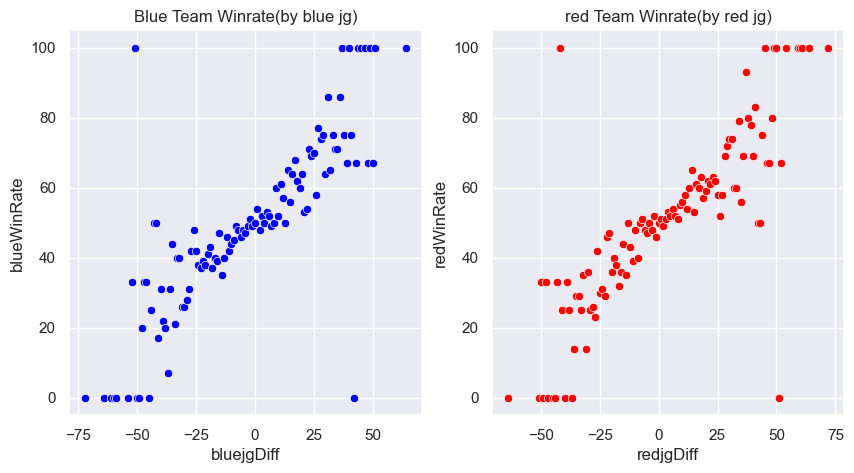

In [119]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=jg_data_blue, x = 'bluejgDiff', y = 'blueWinRate', ax = ax[0], color = 'blue')
sns.scatterplot(data=jg_data_red, x = 'redjgDiff', y = 'redWinRate', ax = ax[1], color = 'red')
ax[0].set_title('Blue Team Winrate(by blue jg)')
ax[1].set_title('red Team Winrate(by red jg)')

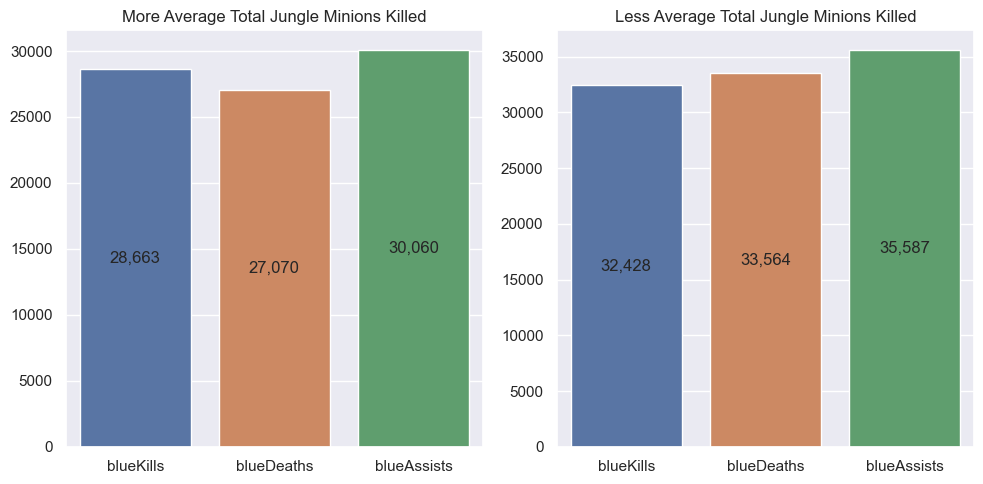

평균보다 정글몹을 많이 먹은 경기의 평균 킬, 데스, 어시스트 : kills:5.9, deaths:5.57, assists:6.19 
평균보다 정글몹을 적게 먹은 경기의경기의 평균 킬, 데스, 어시스트 : kills:6.46, deaths:6.68, assists:7.08 


In [147]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
ax = sns.barplot(x = ['blueKills', 'blueDeaths', 'blueAssists'], y=[jungle_mean_up['blueKills'].sum(), jungle_mean_up['blueDeaths'].sum(), jungle_mean_up['blueAssists'].sum()])
for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('More Average Total Jungle Minions Killed')

plt.subplot(1,2,2)
ax = sns.barplot(x = ['blueKills', 'blueDeaths', 'blueAssists'], y=[jungle_mean_down['blueKills'].sum(), jungle_mean_down['blueDeaths'].sum(), jungle_mean_down['blueAssists'].sum()])
for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Less Average Total Jungle Minions Killed')

plt.tight_layout()
plt.show()

print('평균보다 정글몹을 많이 먹은 경기의 평균 킬, 데스, 어시스트 : kills:{}, deaths:{}, assists:{} '.format(round(jungle_mean_up['blueKills'].mean(),2), round(jungle_mean_up['blueDeaths'].mean(),2), round(jungle_mean_up['blueAssists'].mean(),2)))
print('평균보다 정글몹을 적게 먹은 경기의경기의 평균 킬, 데스, 어시스트 : kills:{}, deaths:{}, assists:{} '.format(round(jungle_mean_down['blueKills'].mean(),2), round(jungle_mean_down['blueDeaths'].mean(),2), round(jungle_mean_down['blueAssists'].mean(),2)))

- 위 그래프는 평균보다 정글몹을 많이 먹은 경기와 적게 먹은 경기의 평균 킬, 데스, 어시스트를 보여준다.
- 평균보다 많이 먹을수록 평균 킬, 데스, 어시스트가 적은것을 알 수 있다.
- 이것은 상대방과 전투를 하기 보다는 상대방의 진영에 있는 정글몬스터까지 먹은 것을 알 수 있다.
- 보통 카정(상대방 진영에 들어가 정글몬스터를 빼먹는 행위)을 할때 같이 들어가 싸워주는 경우가 많은데, 그렇지 않고 오히려 전투를 지양했다고 볼 수 있다.
- 카정을 많이 할때는 전투가 적게 일어난다는 것을 알 수 있었다.

#### 살아있는 와드를 뜻하는 aliveward 변수를 만들어 정글몹과의 관계 표현해보기
- 카정을 가기 위해서는 상대방의 위치를 알 수 있는 와드(ward)를 많이 설치한다.
- 따라서 와드의 갯수에 따른 정글몬스터와의 관계를 분석해본다.

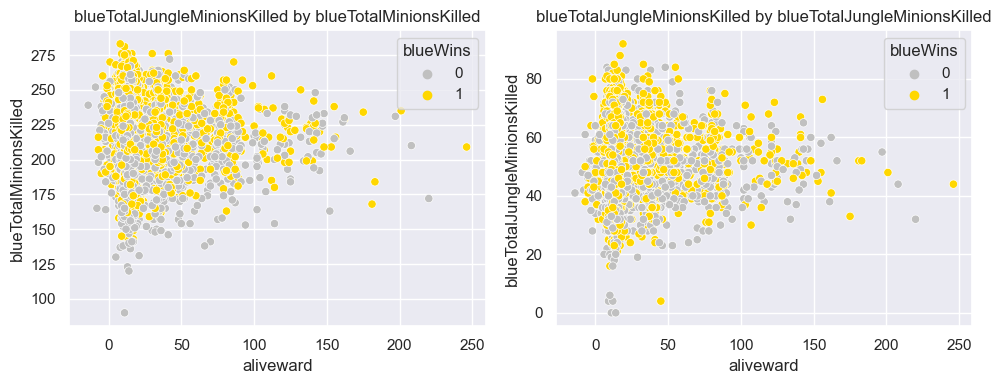

In [129]:
df['aliveward'] = df['blueWardsPlaced'] - df['blueWardsDestroyed']

miniuns = ['blueTotalMinionsKilled','blueTotalJungleMinionsKilled']
count =1 
plt.figure(figsize=[10,4])
for k in miniuns:
    plt.subplot(1,len(miniuns),count)
    sns.scatterplot(x = 'aliveward', y = k, hue = 'blueWins', data = df, palette=['silver', 'gold'])
    plt.title(f'{i} by {k}')
    count += 1
plt.tight_layout() #플롯간 여백 조정
plt.show()

(4856, 46)
(5023, 46)


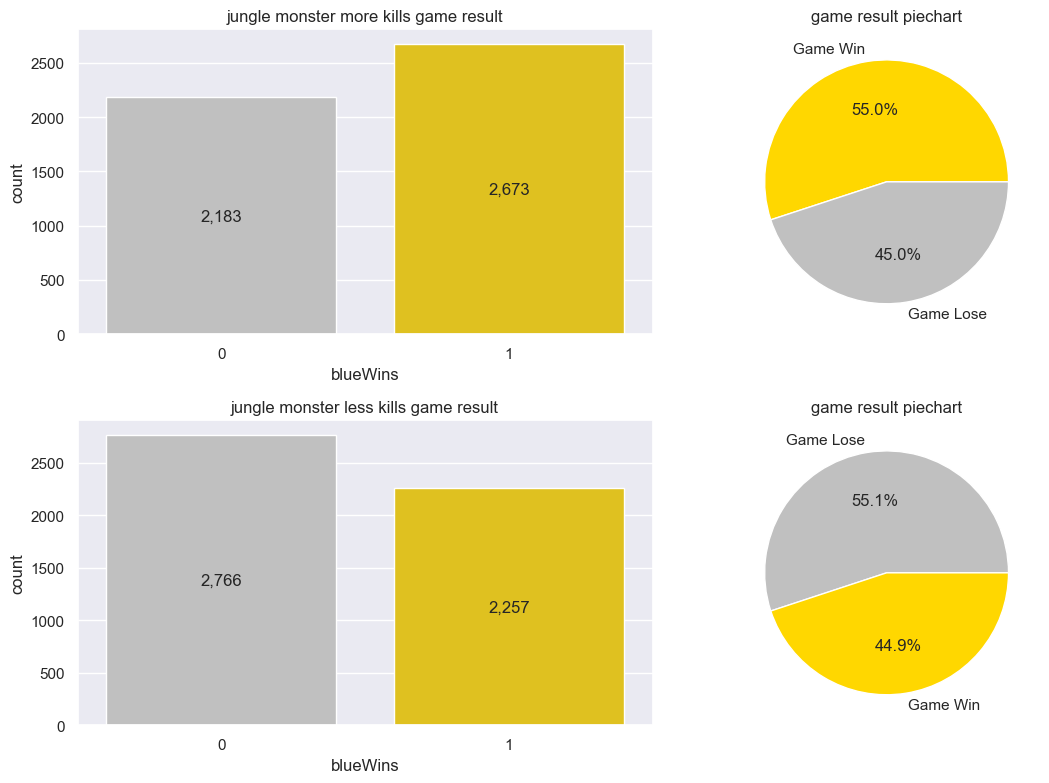

In [125]:
#평균 정글몹보다 많이 먹은 경기와 평균보다 적게 먹은 경기 추출
jungle_mean_up = df[df['blueTotalJungleMinionsKilled']>=df['blueTotalJungleMinionsKilled'].mean()]
jungle_mean_down = df[df['blueTotalJungleMinionsKilled']<df['blueTotalJungleMinionsKilled'].mean()]

plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
ax = sns.countplot(x = 'blueWins', data = jungle_mean_up, palette=['silver', 'gold'])
for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('jungle monster more kills game result')
        
plt.subplot(2,2,2)
plt.pie(jungle_mean_up['blueWins'].value_counts(),labels=['Game Win','Game Lose'], autopct = '%1.1f%%',colors=['gold','silver'])
plt.title('game result piechart')

plt.subplot(2,2,3)
ax = sns.countplot(x = 'blueWins', data = jungle_mean_down, palette=['silver', 'gold'])
for containers in ax.containers:
        ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('jungle monster less kills game result')

plt.subplot(2,2,4)
plt.pie(jungle_mean_down['blueWins'].value_counts(),labels=['Game Lose','Game Win'], autopct = '%1.1f%%',colors=['silver','gold'])
plt.title('game result piechart')

plt.tight_layout()
plt.show()

### 가설 3의 결론
- 가장 먼저 승리와의 연관성을 뜻하는 상관 계수를 분석해본 결과 정글러가 처치한 몬스터의 수 자체는 승리를 결정하는 매우 중요한 지표는 아니었다.
- 하지만 처치한 몬스터의 수를 기반으로 승률을 분석해본 결과 10분까지 20마리 이내의 격차는 게임의 큰 영향을 주지 못하지만 20마리 이상의 차이부터는 60% 이상의 수치를 보인다.
- 이러한 수치를 바탕으로 분석해 보았을 때 어중간하게 팀원을 돕는 것 보다 성장을 택해 정글 몬스터를 중점적으로 사냥을 해 20마리 이상의 격차를 벌릴 수 있다면 승률을 높이는데 큰 도움이 될 것이다.
- 정글몹을 평균보다 많이 먹은 경기에서는 전투가 많이 안일어났지만, 경기 결과는 더 많이 이긴것을 확인 할 수 있었다.
- 정글몹을 잡으면 돈과 경험치를 주기 때문에 경기에서 승리를 했다고 생각해볼 수 있다.

## 모델 학습

In [25]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [26]:
df.drop(["gameId"],1,inplace=True)

제한 것 : 'blueWardsPlaced', 'blueWardsDestroyed', 'blueAvgLevel', 'blueTowersDestroyed'

고려 중 : 'blueDragons', 'blueHeralds', 'blueTotalJungleMinionsKilled'

In [28]:
X_num = df[['blueEliteMonsters', 'blueTotalGold', 'blueKills', 'blueDeaths', 'blueAssists',
        'blueTotalExperience', 'blueTotalMinionsKilled','blueGoldDiff', 'blueExperienceDiff',
         'blueCSPerMin', 'blueTotalJungleMinionsKilled',
        'blueGoldPerMin' ]]

X_cat = df[['blueFirstBlood', 'blueDragons', 'blueHeralds']]


정규화 작업을 통해 단위를 무시하고 값으로 단순 비교할 수 있게 해본다.

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_num)
X = pd.DataFrame(X, index = X_num.index , columns = X_num.columns)

In [30]:
X = pd.concat([X, X_cat],axis = 1)
y = df['blueWins']

X.head()

,blueEliteMonsters,blueTotalGold,blueKills,blueDeaths,blueAssists,blueTotalExperience,blueTotalMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueTotalJungleMinionsKilled,blueGoldPerMin,blueFirstBlood,blueDragons,blueHeralds
0,-0.879231,0.460179,0.935301,-0.046926,1.071495,-0.740639,-0.992782,0.256228,0.013342,-0.992782,-1.465951,0.460179,1,0,0
1,-0.879231,-1.166792,-0.393216,-0.387796,-0.404768,-1.385391,-1.953558,-1.191254,-0.593342,-1.953558,-0.758722,-1.166792,0,0,0
2,0.719503,-0.254307,0.271042,1.657424,-0.650812,-1.422043,-1.404543,-0.483614,-0.520436,-1.404543,-0.455624,-0.254307,0,1,0
3,0.719503,-0.876959,-0.725346,-0.387796,-0.404768,0.021567,-0.718275,-0.544350,0.013863,-0.718275,0.453671,-0.876959,0,0,1
4,-0.879231,-0.067382,-0.061087,-0.046926,-0.158724,0.512211,-0.306513,-0.415133,0.137283,-0.306513,0.655736,-0.067382,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 1)

### 로지스틱 회귀

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1239
           1       0.74      0.75      0.74      1231

    accuracy                           0.74      2470
   macro avg       0.74      0.74      0.74      2470
weighted avg       0.74      0.74      0.74      2470



<AxesSubplot:>

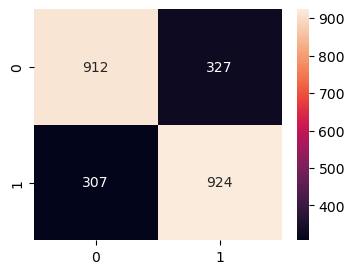

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = classifier.predict(X_test)
y_predict_test

plt.figure(figsize=(4,3))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, fmt='g', annot=True)

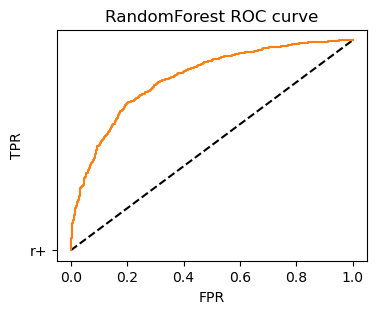

0.8191034802443469

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


plt.figure(figsize=(4,3))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

rand_score = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
rand_score

### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1239
           1       0.68      0.69      0.69      1231

    accuracy                           0.69      2470
   macro avg       0.69      0.69      0.69      2470
weighted avg       0.69      0.69      0.69      2470



<AxesSubplot:>

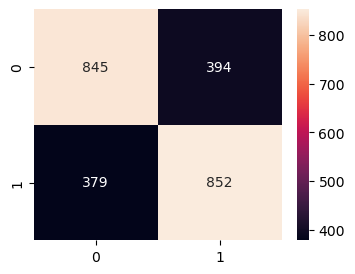

In [36]:
y_predict_test = classifier.predict(X_test)
y_predict_test

plt.figure(figsize=(4,3))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, fmt='g', annot=True)

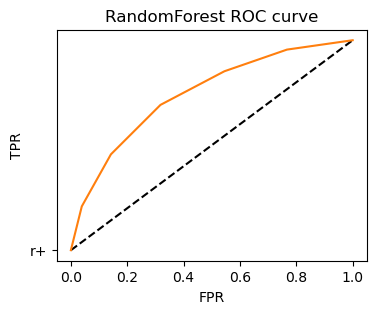

0.7432092913167967

In [37]:
plt.figure(figsize=(4,3))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

rand_score = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
rand_score

### SVM (kernel)

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', probability=True)
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1239
           1       0.74      0.74      0.74      1231

    accuracy                           0.74      2470
   macro avg       0.74      0.74      0.74      2470
weighted avg       0.74      0.74      0.74      2470



<AxesSubplot:>

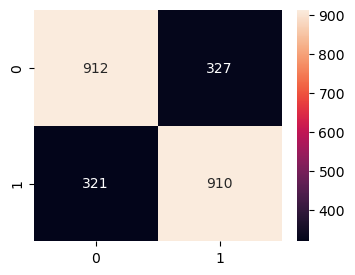

In [39]:
y_predict_test = classifier.predict(X_test)
y_predict_test

plt.figure(figsize=(4,3))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, fmt='g', annot=True)

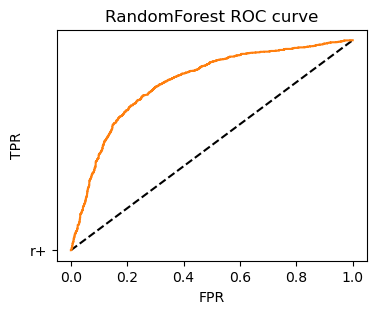

0.798738074585188

In [40]:
plt.figure(figsize=(4,3))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

rand_score = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
rand_score

### 나이브 베이즈

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1239
           1       0.73      0.72      0.72      1231

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470



<AxesSubplot:>

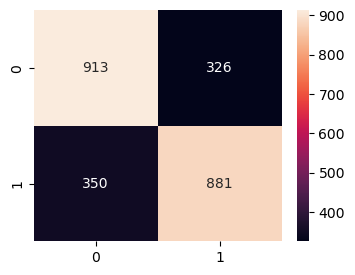

In [42]:
y_predict_test = classifier.predict(X_test)
y_predict_test

plt.figure(figsize=(4,3))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, fmt='g', annot=True)

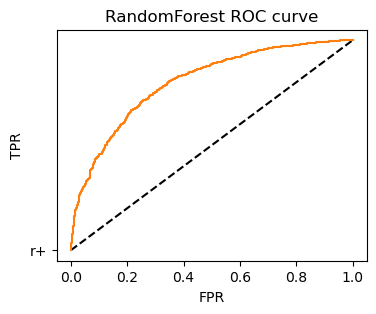

0.8004175165501908

In [43]:
plt.figure(figsize=(4,3))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

rand_score = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
rand_score

### 랜덤 포레스트

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1239
           1       0.73      0.66      0.69      1231

    accuracy                           0.71      2470
   macro avg       0.71      0.71      0.71      2470
weighted avg       0.71      0.71      0.71      2470



<AxesSubplot:>

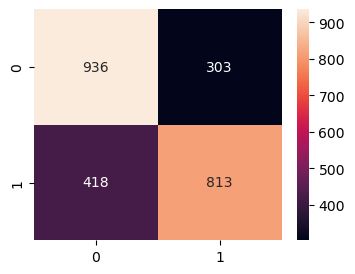

In [45]:
y_predict_test = classifier.predict(X_test)
y_predict_test

plt.figure(figsize=(4,3))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, fmt='g', annot=True)

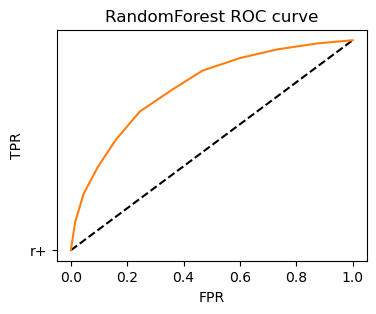

0.7767168302835874

In [46]:
plt.figure(figsize=(4,3))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

rand_score = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
rand_score

### XGB + Grid Search

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

classifier= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.1,0.15],
    'max_depth' : [3,7,10],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
#여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
xgb_grid=GridSearchCV(classifier, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, verbose = 2)
xgb_grid.fit(X_train, y_train)

#best f1_macro 수치와 best parameter확인
print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
best f1_macro :  0.7277
best param :  {'colsample_bytree': 0.9, 'gamma': 3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


,params,mean_test_score,rank_test_score
316,"{'colsample_bytree': 0.9, 'gamma': 3, 'learnin...",0.727651,1
181,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.727517,2
226,"{'colsample_bytree': 0.9, 'gamma': 1, 'learnin...",0.727517,2
30,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.727277,4
271,"{'colsample_bytree': 0.9, 'gamma': 2, 'learnin...",0.727246,5
319,"{'colsample_bytree': 0.9, 'gamma': 3, 'learnin...",0.727231,6
182,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.726960,7
60,"{'colsample_bytree': 0.8, 'gamma': 1, 'learnin...",0.726814,8
47,"{'colsample_bytree': 0.8, 'gamma': 1, 'learnin...",0.726811,9
2,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.726811,10


In [51]:
pred = xgb_grid.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1239
           1       0.74      0.75      0.74      1231

    accuracy                           0.74      2470
   macro avg       0.74      0.74      0.74      2470
weighted avg       0.74      0.74      0.74      2470



<AxesSubplot:>

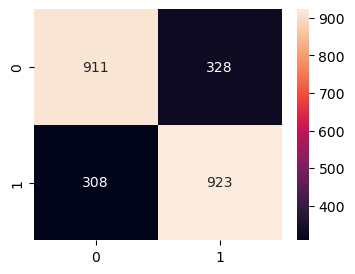

In [52]:
y_predict_test = xgb_grid.predict(X_test)
y_predict_test

plt.figure(figsize=(4,3))

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, fmt='g', annot=True)

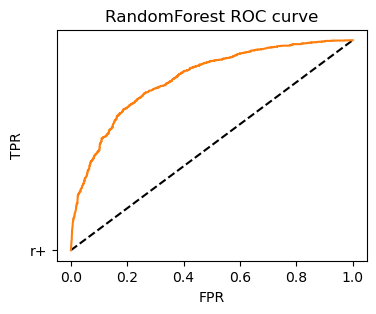

0.8157908194876899

In [53]:
plt.figure(figsize=(4,3))
fpr, tpr, thresholds = roc_curve(y_test, xgb_grid.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

rand_score = roc_auc_score(y_test, xgb_grid.predict_proba(X_test)[:,1])
rand_score

결론

1. 로지스틱 회귀
    - 정확도 : 0.74
    - AUC : 0.819


2. KNN
    - 정확도 : 0.69
    - AUC : 0.743


3. SVM (kernel)
    - 정확도 : 0.74
    - AUC : 0.799


4. 나이브베이즈
    - 정확도 : 0.73
    - AUC : 0.800


5. 랜덤 포레스트
    - 정확도 : 0.71
    - AUC : 0.777


6. XGB + Grid Search
    - 정확도 : 0.74
    - AUC : 0.816
    
    
1번이 가장 높은 정확도와 AUC가 도출되었다.